<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Assignment_6B_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import *

Using TensorFlow backend.


# Loading the Cifar Data

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


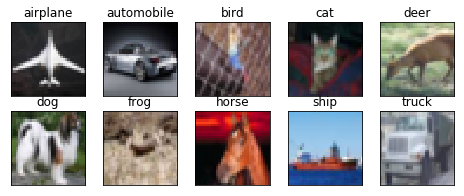

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Defining Functions for Model Stats

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# Data Preprocessing

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Baseline Architecture

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # rf = 3x3, ip = 32x32
model.add(Activation('relu')) 
model.add(Convolution2D(48, 3, 3)) # rf = 5X5, ip = 32x32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # rf = 10X10, ip = 30x30 
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) # rf = 12x12, ip = 15x15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) # rf = 14x14, ip = 15x15
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #rf = 28x28, ip = 13x13
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #rf = 30x30, ip = 6x6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) #rf = 32x32, ip = 6x6
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #rf = 34x34, ip = 3x3
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)        41568     
__________

## Training the Baseline Architecture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 9s 24ms/step - loss: 1.8772 - acc: 0.2884 - val_loss: 1.4549 - val_acc: 0.4654
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.3996 - acc: 0.4928 - val_loss: 1.1835 - val_acc: 0.5696
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1789 - acc: 0.5805 - val_loss: 1.0400 - val_acc: 0.6378
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 1.0397 - acc: 0.6390 - val_loss: 0.9382 - val_acc: 0.6711
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9282 - acc: 0.6771 - val_loss: 0.9164 - val_acc: 0.6842
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8423 - acc: 0.7083 - val_loss: 0.8392 - val_acc: 0.7148
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7828 - acc: 0.7318 - val_loss: 0.7508 - val_acc: 0.7419
Epoch 8/100
390/390 [==============================] - 9s 22ms

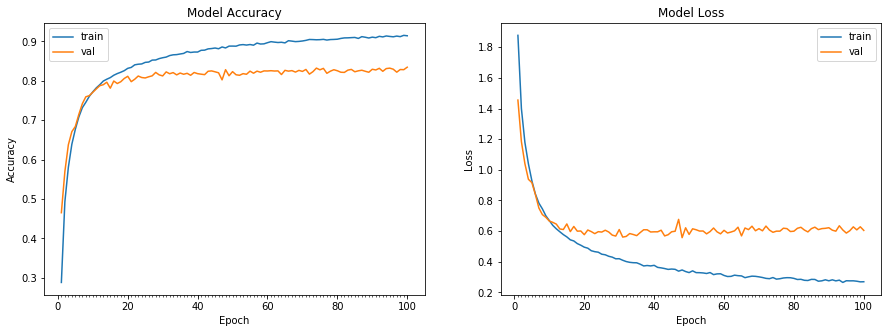

Accuracy on test data is: 83.46


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Architecture Using Guidelines
1. Normal Convolution 
2. Separable Convolution 
3. Depthwise Convolution
4. Grouped Convolution (use 3x3, 5x5 only)
5. Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

In [7]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten,SeparableConv2D
from keras.regularizers import l2
from keras.layers import Concatenate

input = Input(shape=(32, 32, 3,))

#defining convolution block
def conv_block(inputs, filters, kernel_size = (3,3) ,padding = 'valid', dilation_rate = 1):
  conv = Conv2D(filters = filters, kernel_size = kernel_size, padding=padding, dilation_rate=dilation_rate, use_bias=False)(inputs)     
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv) # BN before ReLu
  conv = Activation('relu')(conv)
  return conv

#defining depthwise separable convolution
def depthWise_conv(inputs, filters, padding = 'valid', ):
  conv = SeparableConv2D(filters = filters, kernel_size = (3,3), padding = padding,use_bias=False)(inputs)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv) # BN before ReLu
  conv = Activation('relu')(conv)
  return conv

#defining spatially separable convolution
def separable_conv(inputs, filters, padding = 'valid', ):
  conv = Conv2D(filters = filters, kernel_size = (3,1), padding = padding,use_bias=False)(inputs)
  conv = Conv2D(filters = filters*2, kernel_size = (1,3), padding = padding,use_bias=False)(conv)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv) # BN before ReLu
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#defining grouped convolution
def grouped_conv (conv1, conv2):
  conv = Concatenate()([conv1, conv2]) # explicitly made sure that the size of the inputs are same
  return conv


#Building the architecture

## 1st two layers of Normal convolutions
First_Layer   =     conv_block(input, 32, padding = 'valid')                                  #ip = 32, RF = 3x3
Second_Layer  =     conv_block(First_Layer,64, padding = 'valid')                             #ip = 30, RF = 5x5

##adding the spatially seperable conv
Third_Layer   =     separable_conv(Second_Layer,128, padding = 'valid')                       #ip = 28, RF = 7x7

##adding the depthwise seperable conv
Fourth_Layer  =     depthWise_conv(Third_Layer,256, padding = 'valid')                        #ip = 26, RF = 9x9

## adding 1st transition or bottleneck layer
Transition_1  =     bottleneck(Fourth_Layer,64)                                               #ip = 24, RF = 18x18

## 3x3 with dilation = 1
group1_part1  =     conv_block(Transition_1,64, padding = 'same')                             #ip = 12, RF = 20x20
## 5x5 with dilation = 1
group1_part2  =     conv_block(Transition_1,64,kernel_size = (5,5), padding = 'same')         #ip = 12, RF = 22x22 
## 1st group convolution using the above two layers
Fifth_Layer_Group1  =   grouped_conv(group1_part1,group1_part2)                               #ip = 12, RF = 22x22

## 3x3 with dilation = 2
group2_part1  =     conv_block(Fifth_Layer_Group1,128, padding = 'same', dilation_rate = 2)   #ip = 12, RF = 24x24 
## 2nd group convolution using 2 3x3 conv, one with dilation = 1 and other with dilation = 2
Sixth_Layer_Group2  =  grouped_conv(group1_part1,group2_part1)                                #ip = 12, RF = 24x24

## Two layers of normal convolution
Seventh_Layer =     conv_block(Sixth_Layer_Group2,256, padding = 'valid')                     #ip = 12, RF = 26x26 
Eigth_Layer   =      conv_block(Seventh_Layer,512, padding = 'valid')                         #ip = 10, RF = 26x26 

last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Eigth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (8,8), padding = 'valid', use_bias = False)(last1x1) 
flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])

#model summary
model.summary()

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 30, 30, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1

## Training the model

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 62s 158ms/step - loss: 1.5447 - acc: 0.4336 - val_loss: 1.9709 - val_acc: 0.4451
Epoch 2/50
390/390 [==============================] - 58s 149ms/step - loss: 1.1124 - acc: 0.6011 - val_loss: 1.5194 - val_acc: 0.5356
Epoch 3/50
390/390 [==============================] - 57s 146ms/step - loss: 0.8937 - acc: 0.6846 - val_loss: 1.3665 - val_acc: 0.6203
Epoch 4/50
390/390 [==============================] - 57s 146ms/step - loss: 0.7746 - acc: 0.7276 - val_loss: 1.1738 - val_acc: 0.6566
Epoch 5/50
390/390 [==============================] - 57s 146ms/step - loss: 0.6859 - acc: 0.7605 - val_loss: 1.0311 - val_acc: 0.7069
Epoch 6/50
390/390 [==============================] - 57s 146ms/step - loss: 0.6195 - acc: 0.7832 - val_loss: 1.1562 - val_acc: 0.6832
Epoch 7/50
390/390 [==============================] - 57s 146ms/step - loss: 0.5653 - acc: 0.8027 - val_loss: 0.8237 - val_acc: 0.7572
Epoch 8/50
390/390 [==============================] - 5

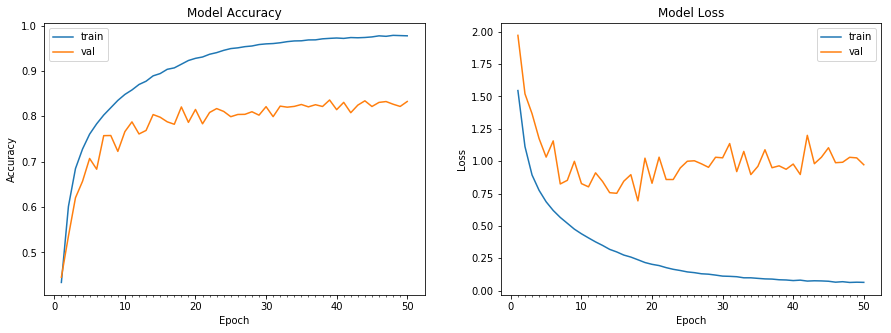

Accuracy on test data is: 83.25


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1 )


end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
